###  **Data Collection and Understanding**

In [ ]:
# File uploading
from google.colab import files
uploaded = files.upload()


Saving IMDb Movies India.csv to IMDb Movies India.csv


In [ ]:
# Importing required libraries
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
import re

In [ ]:
# Importing CSV data as pandas dataframe
movies = pd.read_csv('/content/IMDb Movies India.csv', encoding='latin-1')

In [ ]:
# Data Overview
movies.head()

,Name,Year,Duration,Genre,Rating,Votes,Director,Actor 1,Actor 2,Actor 3
0,Gadhvi He thought he was Gandhi,2019,109,Drama,7.0,8,Gaurav Bakshi,Rasika Dugal,Vivek Ghamande,Arvind Jangid
1,Yaaram,2019,110,"Comedy, Romance",4.4,35,Ovais Khan,Prateik,Ishita Raj,Siddhant Kapoor
2,Aur Pyaar Ho Gaya,1997,147,"Comedy, Drama, Musical",4.7,827,Rahul Rawail,Bobby Deol,Aishwarya Rai Bachchan,Shammi Kapoor
3,Yahaan,2005,142,"Drama, Romance, War",7.4,1086,Shoojit Sircar,Jimmy Sheirgill,Minissha Lamba,Yashpal Sharma
4,A Question Mark,2012,82,"Horror, Mystery, Thriller",5.6,326,Allyson Patel,Yash Dave,Muntazir Ahmad,Kiran Bhatia


In [ ]:
# No of Rows and Columns
movies.shape

(15509, 10)

In [ ]:
# No of Null Values column wise
movies.isnull().sum()

,0
Name,0
Year,528
Duration,8269
Genre,1877
Rating,7590
Votes,7589
Director,525
Actor 1,1617
Actor 2,2384
Actor 3,3144


In [ ]:
# droping null value rows
movies.dropna(inplace=True)

In [ ]:
# No of Rows and COlumns after removing null values
movies.shape

(5659, 10)

In [ ]:
# Index reset after removing null values
movies.reset_index(drop=True, inplace=True)
movies.head()

,Name,Year,Duration,Genre,Rating,Votes,Director,Actor 1,Actor 2,Actor 3
0,#Gadhvi (He thought he was Gandhi),(2019),109 min,Drama,7.0,8,Gaurav Bakshi,Rasika Dugal,Vivek Ghamande,Arvind Jangid
1,#Yaaram,(2019),110 min,"Comedy, Romance",4.4,35,Ovais Khan,Prateik,Ishita Raj,Siddhant Kapoor
2,...Aur Pyaar Ho Gaya,(1997),147 min,"Comedy, Drama, Musical",4.7,827,Rahul Rawail,Bobby Deol,Aishwarya Rai Bachchan,Shammi Kapoor
3,...Yahaan,(2005),142 min,"Drama, Romance, War",7.4,"1,086",Shoojit Sircar,Jimmy Sheirgill,Minissha Lamba,Yashpal Sharma
4,?: A Question Mark,(2012),82 min,"Horror, Mystery, Thriller",5.6,326,Allyson Patel,Yash Dave,Muntazir Ahmad,Kiran Bhatia


### **Data Cleaning**

In [ ]:
# Remove special characters in Name column
def filter_string(input_string):
    filtered_string = re.sub(r"[^a-zA-Z0-9 '\-]", '', input_string)
    return filtered_string

movies['Name'] = movies['Name'].apply(lambda x: filter_string(x))

In [ ]:
# Extracting no of minutes
def extract_minutes(time_string):
  match = re.search(r'(\d+)\s*min', time_string)
  if match:
    return int(match.group(1))
  return None

movies['Duration'] = movies['Duration'].apply(extract_minutes)

In [ ]:
# Extracting Movie year as int
def extract_year(year_string):
  match = re.search(r'\((\d{4})\)', year_string)
  if match:
    return int(match.group(1))
  return None

movies['Year'] = movies['Year'].apply(extract_year)

In [ ]:
# Converting no of Votes into int
def convert_to_int(number_string):

    try:
        return int(number_string.replace(',', ''))
    except (ValueError, AttributeError):
        return None
movies['Votes'] = movies['Votes'].apply(convert_to_int)

In [ ]:
# Data overview after Data Preprocessing
movies.head()

,Name,Year,Duration,Genre,Rating,Votes,Director,Actor 1,Actor 2,Actor 3
0,Gadhvi He thought he was Gandhi,2019,109,Drama,7.0,8,Gaurav Bakshi,Rasika Dugal,Vivek Ghamande,Arvind Jangid
1,Yaaram,2019,110,"Comedy, Romance",4.4,35,Ovais Khan,Prateik,Ishita Raj,Siddhant Kapoor
2,Aur Pyaar Ho Gaya,1997,147,"Comedy, Drama, Musical",4.7,827,Rahul Rawail,Bobby Deol,Aishwarya Rai Bachchan,Shammi Kapoor
3,Yahaan,2005,142,"Drama, Romance, War",7.4,1086,Shoojit Sircar,Jimmy Sheirgill,Minissha Lamba,Yashpal Sharma
4,A Question Mark,2012,82,"Horror, Mystery, Thriller",5.6,326,Allyson Patel,Yash Dave,Muntazir Ahmad,Kiran Bhatia


### **Exploratory Data Analysis**

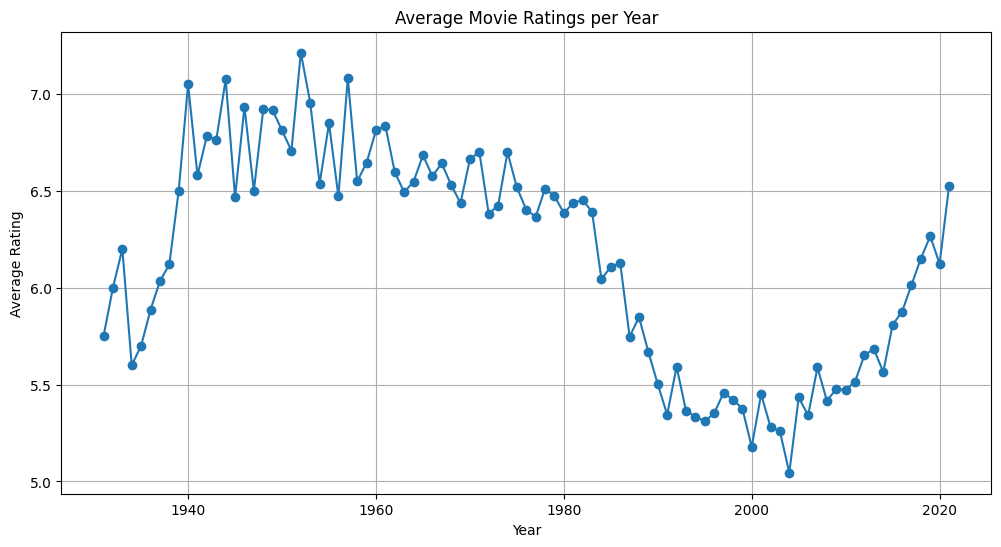

In [ ]:
# Yearly Average Movie ratings
average_ratings_per_year = movies.groupby('Year')['Rating'].mean()

plt.figure(figsize=(12, 6))
plt.plot(average_ratings_per_year.index, average_ratings_per_year.values, marker='o')
plt.xlabel("Year")
plt.ylabel("Average Rating")
plt.title("Average Movie Ratings per Year")
plt.grid(True)
plt.show()

In [ ]:
# Yearly wise Highest Rated Movie
yearly_highest_rated_movies = movies.loc[movies.groupby('Year')['Rating'].idxmax()]
yearly_highest_rated_movies

,Name,Year,Duration,Genre,Rating,Votes,Director,Actor 1,Actor 2,Actor 3
5144,The Light of the World,1931,124,"Drama, Fantasy",6.2,112,Ardeshir Irani,Master Vithal,Zubeida,Jillo
2293,Indrasabha,1932,211,"Musical, Romance",6.0,12,J.J. Madan,Nissar,Jehanara Kajjan,Abdul Rehman Kabuli
1736,Fate,1933,68,"Drama, Romance",6.2,12,John Hunt,Devika Rani,Himanshu Rai,Abraham Sofaer
3366,Mazdoor,1934,155,Drama,8.5,6,Mohan Dayaram Bhavnani,Bibbo,S.B. Nayampalli,Paidi Jairaj
2299,Inquilab,1935,144,Drama,7.4,38,Debaki Bose,Durga Khote,Prithviraj Kapoor,Syed Mohammed
...,...,...,...,...,...,...,...,...,...,...
4319,Rediscovering India,2017,124,Documentary,9.0,62,Meenal Dixit,Benny John,Benny John,Meenal Dixit
536,Ashok Vatika,2018,97,Drama,9.3,7,Rahul Mallick,Kunj Anand,Sanjay Bishnoi,Paras Zutshi
1897,Gho Gho Rani,2019,105,"History, Romance",9.4,47,Munni Pankaj,Nishi Neha Mishra,Pankaj Kamal,Akash Kumar
3146,Love Qubool Hai,2020,94,"Drama, Romance",10.0,5,Saif Ali Sayeed,Ahaan Jha,Mahesh Narayan,Rajasree Rajakumari


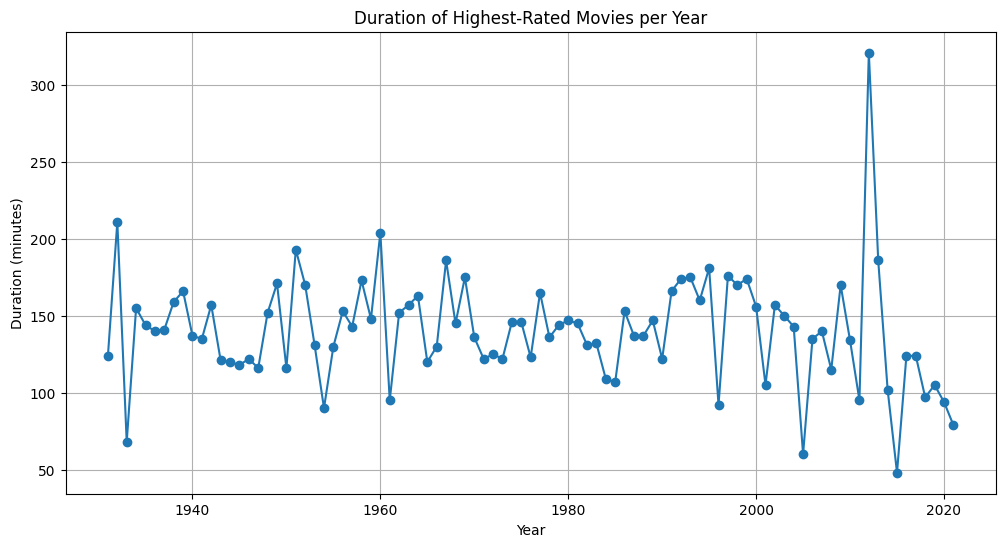

In [ ]:
# Yearly wise Movie Duration of highest rated movie
plt.figure(figsize=(12, 6))
plt.plot(yearly_highest_rated_movies['Year'], yearly_highest_rated_movies['Duration'], marker='o')
plt.xlabel("Year")
plt.ylabel("Duration (minutes)")
plt.title("Duration of Highest-Rated Movies per Year")
plt.grid(True)
plt.show()

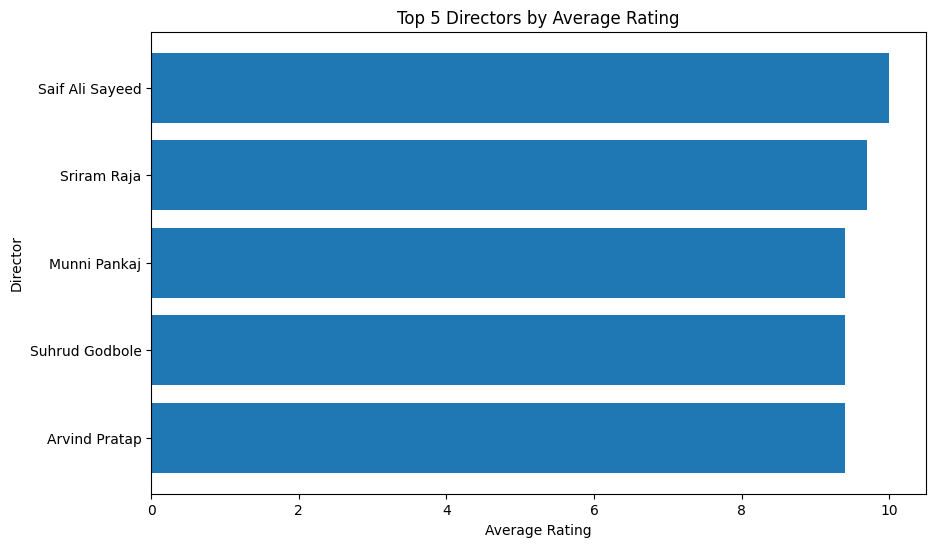

In [ ]:
# Average ratings per Directors
average_ratings = movies.groupby('Director')['Rating'].mean()

# Top 5 Directors
top_5_directors = average_ratings.sort_values(ascending=False).head(5)

plt.figure(figsize=(10, 6))
plt.barh(top_5_directors.index, top_5_directors.values)
plt.xlabel("Average Rating")
plt.ylabel("Director")
plt.title("Top 5 Directors by Average Rating")
plt.gca().invert_yaxis()
plt.show()

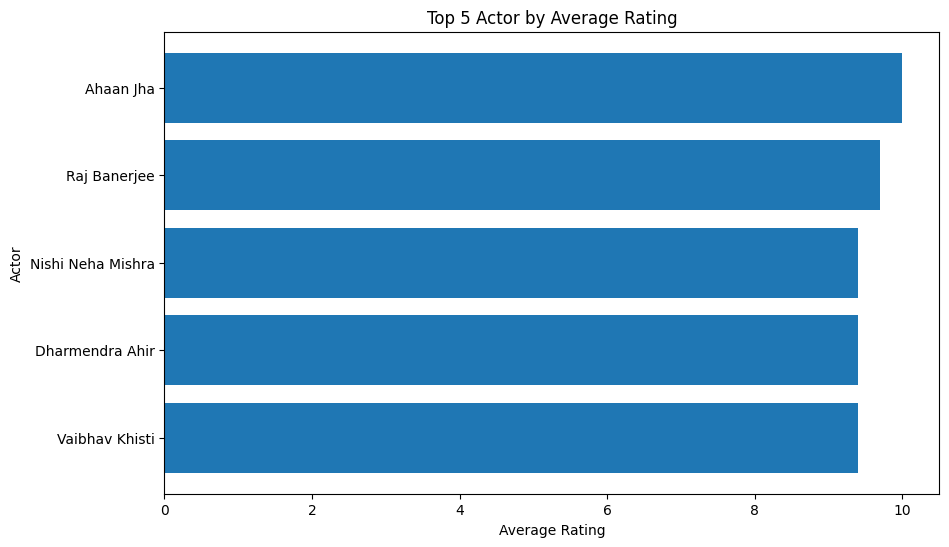

In [ ]:
# Average ratings by Actor
average_ratings_by_actors = movies.groupby('Actor 1')['Rating'].mean()

# Top 5 actoros with highest average ratings
top_5_actor = average_ratings_by_actors.sort_values(ascending=False).head(5)

plt.figure(figsize=(10, 6))
plt.barh(top_5_actor.index, top_5_actor.values)
plt.xlabel("Average Rating")
plt.ylabel("Actor")
plt.title("Top 5 Actor by Average Rating")
plt.gca().invert_yaxis()
plt.show()

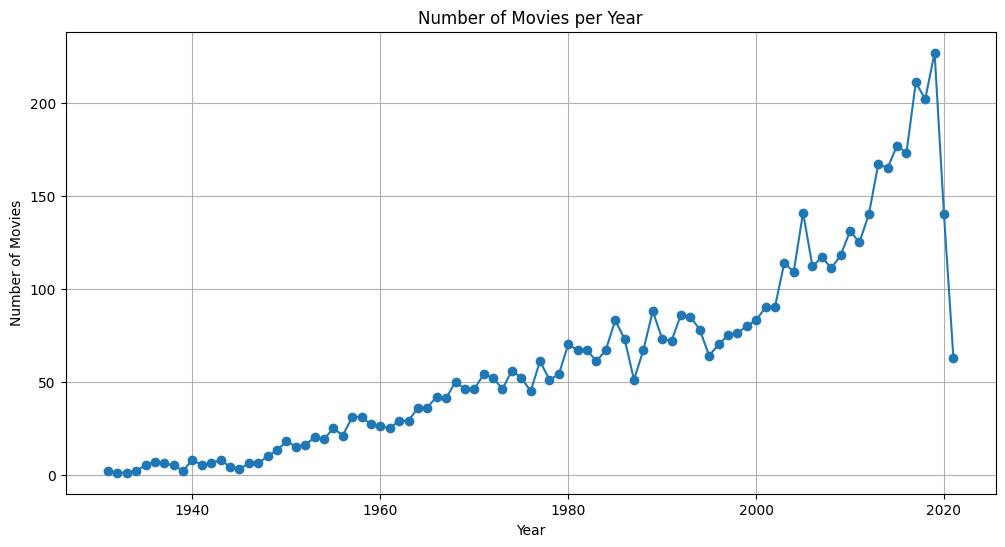

In [ ]:
# Number of movies releasing per year
movies_per_year = movies.groupby('Year')['Name'].count()

plt.figure(figsize=(12, 6))
plt.plot(movies_per_year.index, movies_per_year.values, marker='o')
plt.xlabel("Year")
plt.ylabel("Number of Movies")
plt.title("Number of Movies per Year")
plt.grid(True)
plt.show()

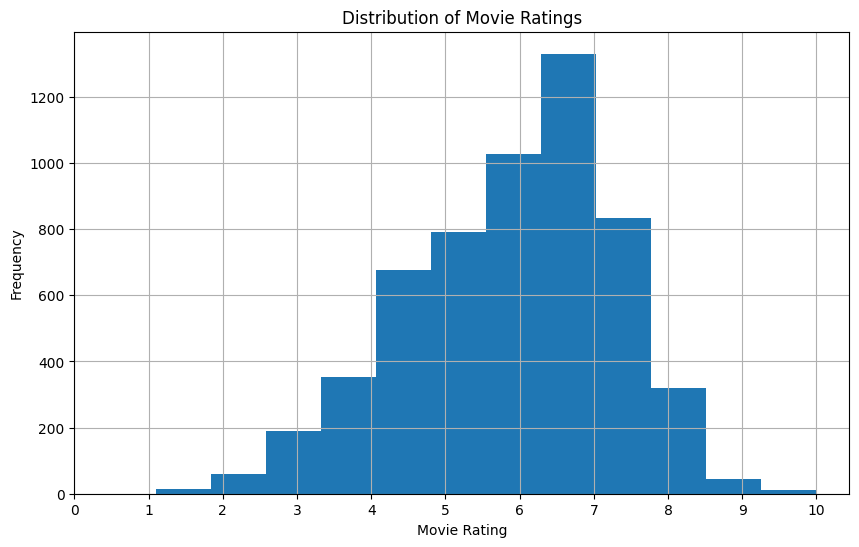

In [ ]:
# Movie ratings distribution
plt.figure(figsize=(10, 6))
plt.hist(movies['Rating'],bins=12)
plt.xlabel("Movie Rating")
plt.ylabel("Frequency")
plt.title("Distribution of Movie Ratings")
plt.grid(True)
plt.xticks(range(11))
plt.show()

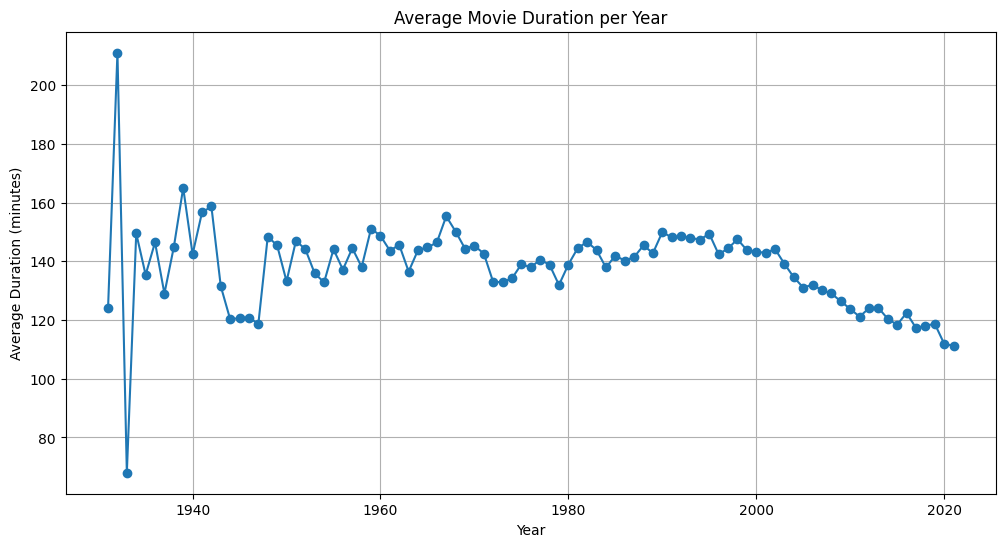

In [ ]:
# Average movie duration - yearly
average_duration_per_year = movies.groupby('Year')['Duration'].mean()

plt.figure(figsize=(12, 6))
plt.plot(average_duration_per_year.index, average_duration_per_year.values, marker='o')
plt.xlabel("Year")
plt.ylabel("Average Duration (minutes)")
plt.title("Average Movie Duration per Year")
plt.grid(True)
plt.show()

In [ ]:
# Genre Analysis
Genre_list = []
Genre_set = set()
for index, row in movies.iterrows():  # Iterate through rows using iterrows()
    genre_value = row['Genre']  # Access the 'Genre' value for the current row
    if ',' in str(genre_value):
        genres = genre_value.split(',')
        for j in range(len(genres)):
          genres[j] = genres[j].strip()
        for i in genres:
            Genre_set.add(i.strip())
    else:
        genres = str(genre_value).strip()
        Genre_set.add(genres)
    Genre_list.append(genres)

In [ ]:
# Creating Genre dictionary
Genre_dict = {}
for i in list(Genre_set):
  sum = 0
  for j in Genre_list:
    if i in j:
      sum += 1
  Genre_dict[i] = sum

In [ ]:
# No of movies - Genre wise
print(Genre_dict)

{'Crime': 875, 'Documentary': 48, 'News': 1, 'Action': 1686, 'Mystery': 304, 'Thriller': 679, 'Adventure': 277, 'Romance': 1380, 'Horror': 202, 'Fantasy': 146, 'Animation': 40, 'Comedy': 1344, 'History': 99, 'Music': 62, 'Family': 416, 'Musical': 412, 'Western': 1, 'War': 33, 'Biography': 115, 'Drama': 3796, 'Sci-Fi': 32, 'Sport': 40}


In [ ]:
# Creating dataframe for Genre analysis
movies_genre = pd.DataFrame(Genre_dict, columns=['Genre', 'Count'])
movies_genre = pd.DataFrame(list(Genre_dict.items()), columns=['Genre', 'Count'])
movies_genre.sort_values(by='Count', ascending=False, inplace=True)
movies_genre.reset_index(drop=True, inplace=True)

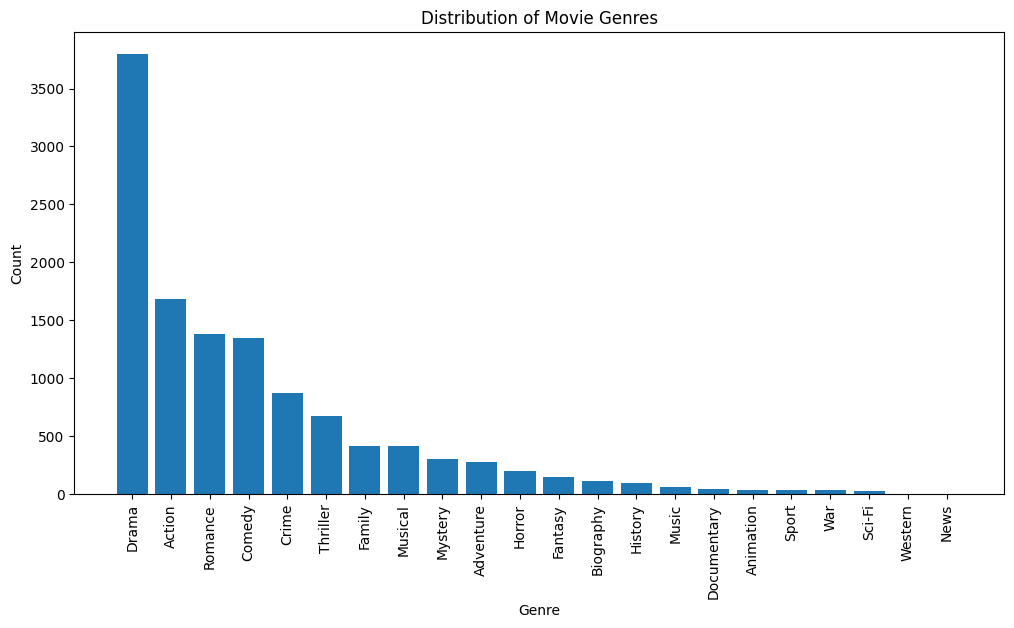

In [ ]:
# Ploting No of movies per Genre
plt.figure(figsize=(12, 6))
plt.bar(movies_genre['Genre'], movies_genre['Count'])
plt.xlabel('Genre')
plt.ylabel('Count')
plt.title('Distribution of Movie Genres')
_ = plt.xticks(rotation=90)

**Key Findings**

* **Data Completeness:** Only 36.48% of the dataset is fully complete without any missing values.

* **Rating Trends:** The average movie ratings declined until the year 2000, showing an upward trend in ratings thereafter.

* **Top-rated Movie Durations:** The yearly highest-rated movies consistently have an average duration of 150 minutes across all years.

* **Release Frequency:** Movie releases show a marked increase, from fewer than 50 movies per year around 1970 to over 200 movies annually after 2020.

* **Ratings Distribution:** The majority of movies receive ratings between 4 and 7 out of 10, indicating a moderate to favorable viewer reception.

* **Average Movie Duration:** The average duration remained around 140 minutes per year until 2000, after which it steadily declined, averaging below 120 minutes by 2020.

* **Popular Genres:** Drama dominates as the most common genre, with over 50% share, followed by Action, Romance, and Comedy. Crime, Thriller, and Family genres rank fifth, sixth, and seventh in popularity, respectively.

### **Data Preprocessing**

In [ ]:
# No of unique values in Column wise

for col in movies.columns:
  if len(col) < 7:
    print(f"{col} \t\t {movies[col].nunique()}")
  else:
    print(f"{col} \t {movies[col].nunique()}")

Name 		 5384
Year 		 91
Duration 	 174
Genre 		 376
Rating 		 83
Votes 		 2027
Director 	 2431
Actor 1 	 1960
Actor 2 	 2321
Actor 3 	 2556


In [ ]:
# Splitting training and testing variables
x = movies.drop(['Name','Rating'], axis=1)
y = movies['Rating']

In [ ]:
# Creating Temp column for Genre separation movie wise
x['Genre_list'] = Genre_list

In [ ]:
# Updating Genres data for all movies
for index in x.index:
  for name in list(Genre_set):
    if name in x['Genre_list'][index]:
      x.loc[index, name] = 1
    else:
      x.loc[index, name] = 0

In [ ]:
# Dropping Temp variables
x.drop(['Genre_list','Genre'], axis=1, inplace=True)

In [ ]:
# Data overview after Genre Separation column wise
x.head()

,Year,Duration,Votes,Director,Actor 1,Actor 2,Actor 3,Crime,Documentary,News,...,History,Music,Family,Musical,Western,War,Biography,Drama,Sci-Fi,Sport
0,2019,109,8,Gaurav Bakshi,Rasika Dugal,Vivek Ghamande,Arvind Jangid,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,1.0,0.0,0.0
1,2019,110,35,Ovais Khan,Prateik,Ishita Raj,Siddhant Kapoor,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
2,1997,147,827,Rahul Rawail,Bobby Deol,Aishwarya Rai Bachchan,Shammi Kapoor,0.0,0.0,0.0,...,0.0,0.0,0.0,1.0,0.0,0.0,0.0,1.0,0.0,0.0
3,2005,142,1086,Shoojit Sircar,Jimmy Sheirgill,Minissha Lamba,Yashpal Sharma,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,1.0,0.0,1.0,0.0,0.0
4,2012,82,326,Allyson Patel,Yash Dave,Muntazir Ahmad,Kiran Bhatia,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0


In [ ]:
# Encoding catagorical columns

from sklearn.preprocessing import LabelEncoder

categorical_cols = ['Director', 'Actor 1','Actor 2','Actor 3']

label_encoder = LabelEncoder()

for col in categorical_cols:
  x[col] = label_encoder.fit_transform(x[col])

x.head()

,Year,Duration,Votes,Director,Actor 1,Actor 2,Actor 3,Crime,Documentary,News,...,History,Music,Family,Musical,Western,War,Biography,Drama,Sci-Fi,Sport
0,2019,109,8,629,1352,2272,319,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,1.0,0.0,0.0
1,2019,110,35,1335,1198,719,2148,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
2,1997,147,827,1530,378,75,2045,0.0,0.0,0.0,...,0.0,0.0,0.0,1.0,0.0,0.0,0.0,1.0,0.0,0.0
3,2005,142,1086,2044,692,1112,2524,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,1.0,0.0,1.0,0.0,0.0
4,2012,82,326,135,1934,1175,1013,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0


In [ ]:
# Normalization of Numerical features

from sklearn.preprocessing import MinMaxScaler

scaler = MinMaxScaler()

columns_to_normalize = x.columns[:7]

x[columns_to_normalize] = scaler.fit_transform(x[columns_to_normalize])

x.head()

,Year,Duration,Votes,Director,Actor 1,Actor 2,Actor 3,Crime,Documentary,News,...,History,Music,Family,Musical,Western,War,Biography,Drama,Sci-Fi,Sport
0,0.977778,0.293333,0.000005,0.258848,0.690148,0.979310,0.124853,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,1.0,0.0,0.0
1,0.977778,0.296667,0.000051,0.549383,0.611536,0.309914,0.840705,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
2,0.733333,0.420000,0.001390,0.629630,0.192956,0.032328,0.800391,0.0,0.0,0.0,...,0.0,0.0,0.0,1.0,0.0,0.0,0.0,1.0,0.0,0.0
3,0.822222,0.403333,0.001828,0.841152,0.353241,0.479310,0.987867,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,1.0,0.0,1.0,0.0,0.0
4,0.900000,0.203333,0.000543,0.055556,0.987238,0.506466,0.396477,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0


In [ ]:
# Train test split of x and y

from sklearn.model_selection import train_test_split

x_train, x_test, y_train, y_test = train_test_split(x, y, test_size=0.2, random_state=42)

### **Model Training**

In [ ]:
from sklearn.metrics import mean_squared_error, r2_score, mean_absolute_error

# Creating empty dictionary for Metrics evaluation
metrics = {}

In [ ]:
# KNN Regression model
from sklearn.neighbors import KNeighborsRegressor

knn_model = KNeighborsRegressor()
knn_model.fit(x_train, y_train)
knn_pred = knn_model.predict(x_test)

# Evaluate KNN Regression
knn_mae = mean_absolute_error(y_test, knn_pred)
knn_mse = mean_squared_error(y_test, knn_pred)
knn_r2 = r2_score(y_test, knn_pred)

# Updating KNN metrics values to dictonary
metrics['KNN Regression'] = [knn_mae, knn_mse, knn_r2]

In [ ]:
# Linear Regression model
from sklearn.linear_model import LinearRegression

linear_model = LinearRegression()
linear_model.fit(x_train, y_train)
linear_pred = linear_model.predict(x_test)

# Evaluate Linear Regression
linear_mae = mean_absolute_error(y_test, linear_pred)
linear_mse = mean_squared_error(y_test, linear_pred)
linear_r2 = r2_score(y_test, linear_pred)

# Updating Linear Regression metrics to dictonary
metrics['Linear Regression'] = [linear_mae, linear_mse, linear_r2]

In [ ]:
# Decision Tree Regression model
from sklearn.tree import DecisionTreeRegressor

tree_model = DecisionTreeRegressor()
tree_model.fit(x_train, y_train)
tree_pred = tree_model.predict(x_test)

# Evaluate Decision Tree Regression
tree_mae = mean_absolute_error(y_test, tree_pred)
tree_mse = mean_squared_error(y_test, tree_pred)
tree_r2 = r2_score(y_test, tree_pred)

# Updating Decision Tree metrics to dictonary
metrics['Decision Tree Regression'] = [tree_mae, tree_mse, tree_r2]

In [ ]:
# Random Forest Regression model
from sklearn.ensemble import RandomForestRegressor

forest_model = RandomForestRegressor()
forest_model.fit(x_train, y_train)
forest_pred = forest_model.predict(x_test)

# Evaluate Random Forest Regression
forest_mae = mean_absolute_error(y_test, forest_pred)
forest_mse = mean_squared_error(y_test, forest_pred)
forest_r2 = r2_score(y_test, forest_pred)

# Updating Random Forest metrics to dictonary
metrics['Random Forest Regression'] = [forest_mae, forest_mse, forest_r2]

### **Model Evaluation**

In [ ]:
# Overview of Metrics evaluaton
metrics_df = pd.DataFrame(metrics, index=['MAE', 'MSE', 'R-2'])
metrics_df = metrics_df.transpose()
metrics_df.head()

,MAE,MSE,R-2
KNN Regression,1.072367,1.821471,0.016348
Linear Regression,1.005927,1.586426,0.143280
Decision Tree Regression,1.159276,2.417023,-0.305269
Random Forest Regression,0.827833,1.204149,0.349722


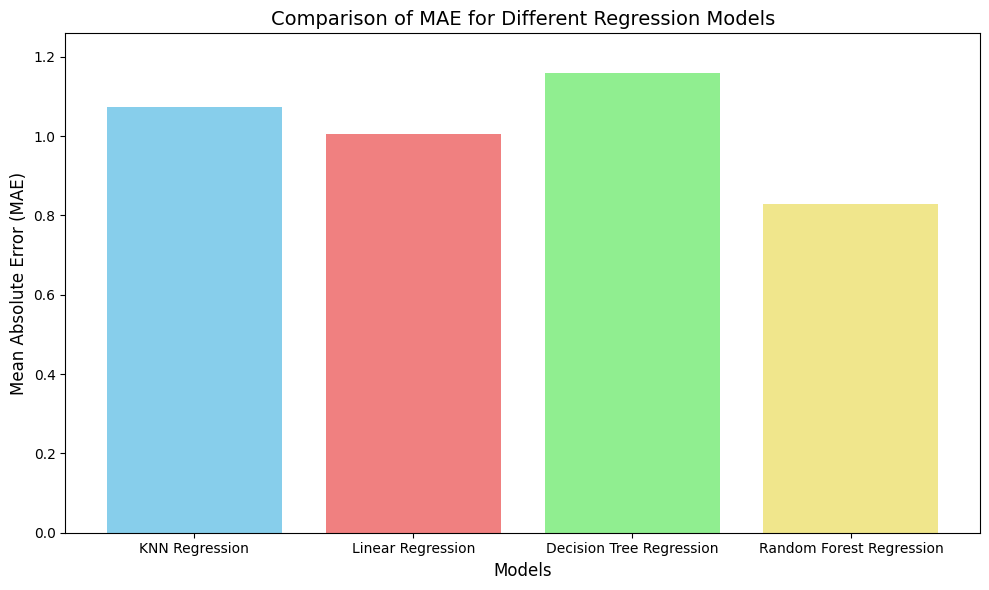

In [ ]:
# Mean Absolute Error Analysis

models = metrics_df.index
mae_values = metrics_df['MAE'].values

plt.figure(figsize=(10, 6))
plt.bar(models, mae_values, color=['skyblue', 'lightcoral', 'lightgreen','khaki'])
plt.xlabel("Models", fontsize=12)
plt.ylabel("Mean Absolute Error (MAE)", fontsize=12)
plt.title("Comparison of MAE for Different Regression Models", fontsize=14)
plt.ylim(0, max(mae_values) + 0.1)
plt.tight_layout()
plt.show()

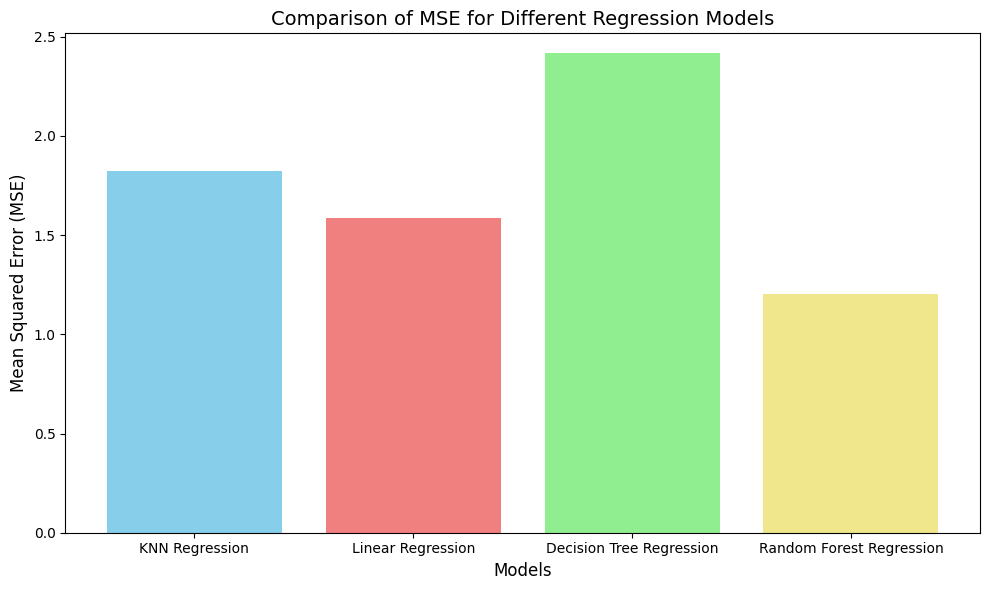

In [ ]:
# Mean Squared Error Analysis
models = metrics_df.index
mae_values = metrics_df['MSE'].values

plt.figure(figsize=(10, 6))
plt.bar(models, mae_values, color=['skyblue', 'lightcoral', 'lightgreen','khaki'])
plt.xlabel("Models", fontsize=12)
plt.ylabel("Mean Squared Error (MSE)", fontsize=12)
plt.title("Comparison of MSE for Different Regression Models", fontsize=14)
plt.ylim(0, max(mae_values) + 0.1)
plt.tight_layout()
plt.show()

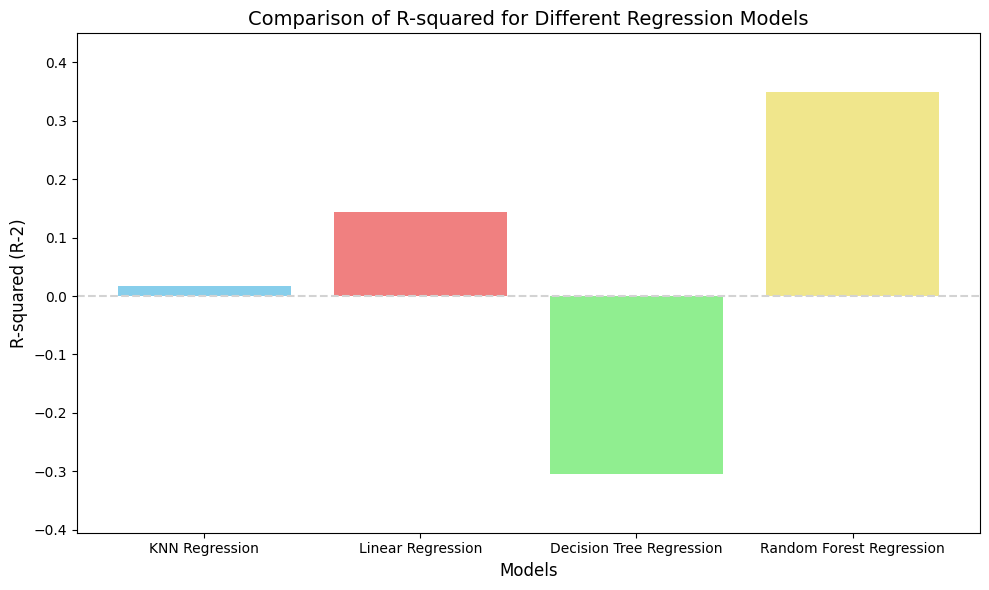

In [ ]:
# R-2 Analysis

models = metrics_df.index
r2_values = metrics_df['R-2'].values

plt.figure(figsize=(10, 6))
plt.bar(models, r2_values, color=['skyblue', 'lightcoral', 'lightgreen', 'khaki'])
plt.xlabel("Models", fontsize=12)
plt.ylabel("R-squared (R-2)", fontsize=12)
plt.title("Comparison of R-squared for Different Regression Models", fontsize=14)
plt.axhline(y=0, color='lightgrey', linestyle='--')
plt.ylim(min(r2_values) - 0.1, max(r2_values) + 0.1)
plt.tight_layout()
plt.show()

### **Key Insights of Trained Models**

* **KNN Regression** has a low R², indicating that it explains very little of the variance in movie ratings. The moderate MAE and MSE suggest it has room for improvement in prediction accuracy.

* **Linear Regression** outperforms KNN in both error metrics and explanatory power (R² = 0.143). It provides better prediction accuracy, making it a relatively more effective model for this data.

* **Decision Tree Regression** shows the highest MAE and MSE, with a negative R² score, suggesting overfitting or poor generalization to new data. It performs the weakest among all models tested.

* **Random Forest Regression** delivers the best performance across all metrics, with the lowest error rates (MAE and MSE) and the highest R² score of 0.350, making it the most reliable model for predicting movie ratings.

# **Conclution**

* **Random Forest Regression** stands out as the optimal model for this dataset, achieving the best balance of accuracy and generalizability.
* Linear Regression is a viable alternative with moderate accuracy, while KNN and Decision Tree models are less effective for this prediction task.